In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter     

In [2]:
data=pd.read_csv('data.csv')
data

,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,sy11etry_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
print(f"Total rows: {len(data)}")


Total rows: 569


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_1ean              569 non-null    float64
 2   texture_1ean             569 non-null    float64
 3   peri1eter_1ean           569 non-null    float64
 4   area_1ean                569 non-null    float64
 5   s1oothness_1ean          569 non-null    float64
 6   co1pactness_1ean         569 non-null    float64
 7   concavity_1ean           569 non-null    float64
 8   concave points_1ean      569 non-null    float64
 9   sy11etry_1ean            569 non-null    float64
 10  fractal_di1ension_1ean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  peri1eter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# Display the first few rows of the dataset
print(data.head())

   diagnosis  radius_1ean  texture_1ean  peri1eter_1ean  area_1ean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   s1oothness_1ean  co1pactness_1ean  concavity_1ean  concave points_1ean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   sy11etry_1ean  ...  radius_worst  texture_worst  peri1eter_worst  \
0         0.2419  ...         25.38          

C:\Users\monic\AppData\Local\Temp\ipykernel_18360\967587250.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='diagnosis', data=data, palette=custom_colors)
C:\Users\monic\AppData\Local\Temp\ipykernel_18360\967587250.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Malignant (0)', 'Benign (1)'])


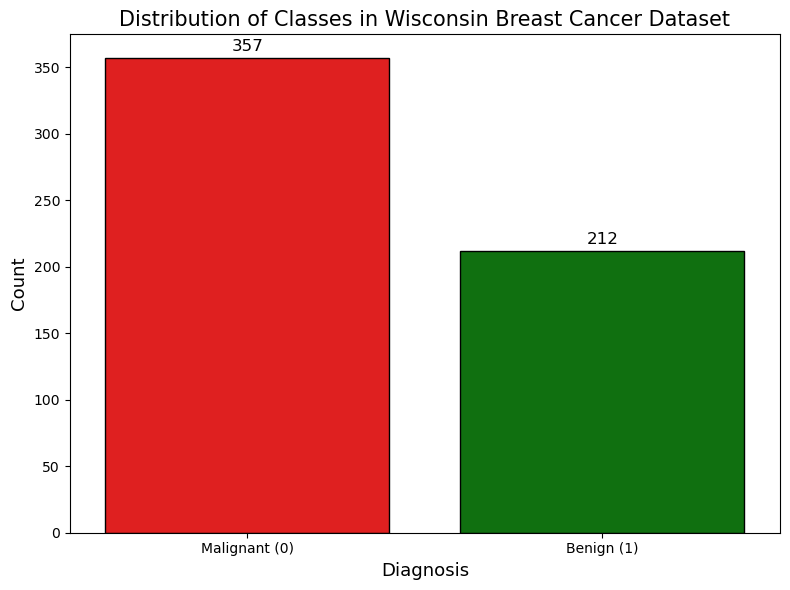

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use list for colors in order: [Malignant (0), Benign (1)]
custom_colors = ['red', 'green']

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=data, palette=custom_colors)

# Set custom x-tick labels
ax.set_xticklabels(['Malignant (0)', 'Benign (1)'])
plt.title('Distribution of Classes in Wisconsin Breast Cancer Dataset', fontsize=15)
plt.xlabel('Diagnosis', fontsize=13)
plt.ylabel('Count', fontsize=13)

# Add count labels and thicker borders
for p in ax.patches:
    height = p.get_height()
    p.set_edgecolor('black')
    p.set_linewidth(1)
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{int(height)}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [8]:
# Assuming the target variable is named 'diagnosis' and is binary (0 for malignant, 1 for benign)
X = data.drop(columns=['diagnosis'])  # Features
X
y = data['diagnosis']  # Target variable
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [9]:
# Split the dataset into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test
print(f"Test set size: {len(y_test)}")

Test set size: 114


In [10]:
scaler = StandardScaler()
scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


--- RFE Results (Top 10 Features) ---
Selected Features:
['radius_1ean', 'concavity_1ean', 'concave points_1ean', 'texture_se', 'radius_worst', 's1oothness_worst', 'co1pactness_worst', 'concavity_worst', 'concave points_worst', 'sy11etry_worst']

--- All Feature Rankings (1 = Selected) ---
                 Feature  Ranking
0            radius_1ean        1
27  concave points_worst        1
26       concavity_worst        1
25     co1pactness_worst        1
6         concavity_1ean        1
7    concave points_1ean        1
24      s1oothness_worst        1
11            texture_se        1
20          radius_worst        1
28        sy11etry_worst        1
8          sy11etry_1ean        2
5       co1pactness_1ean        3
4        s1oothness_1ean        4
12          peri1eter_se        5
21         texture_worst        6


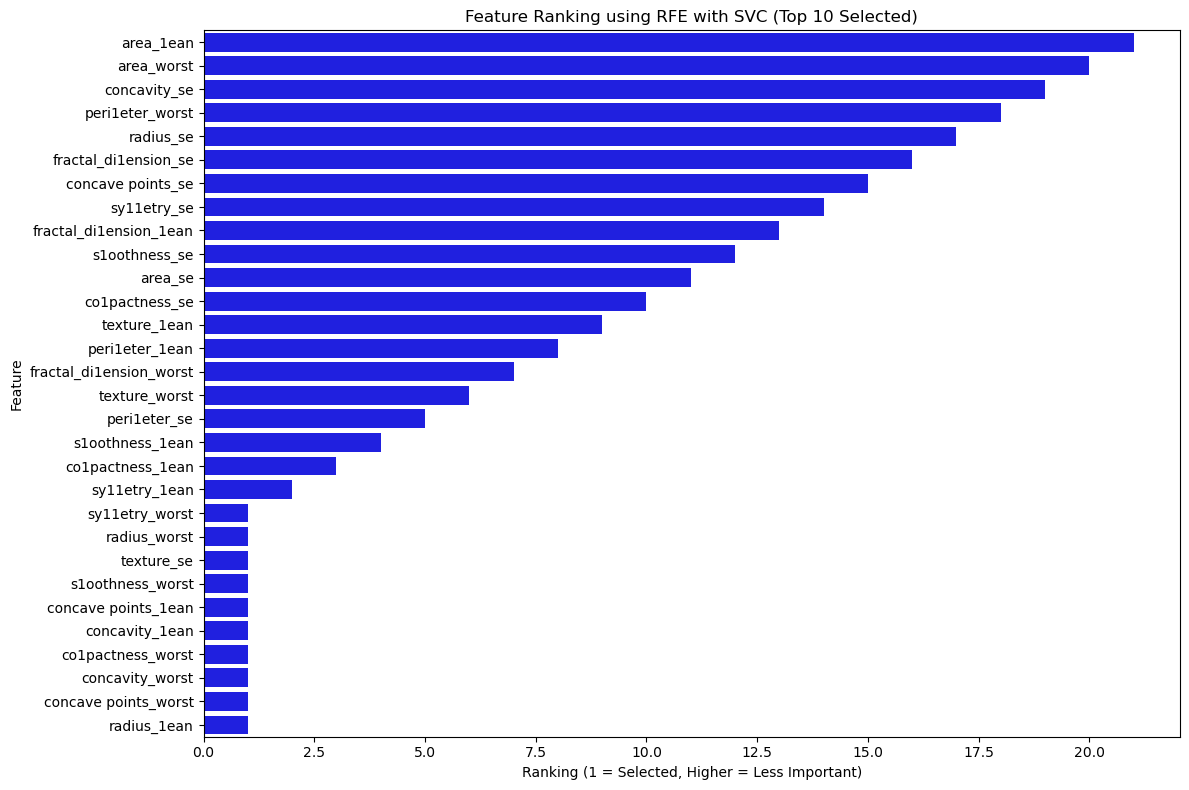

In [11]:
# --- 3. Create the RFE model with an SVM estimator ---
# SVC with a 'linear' kernel is generally used for RFE as it provides feature coefficients.

svc_estimator = SVC(kernel="linear", random_state=42) # Added random_state for reproducibility

# Define how many features you want to select
n_features_to_select = 10 # You can change this number (e.g., 5, 15, or even use RFECV to find optimal)

rfe = RFE(estimator=svc_estimator, n_features_to_select=n_features_to_select, step=1)
rfe.fit(X_train, y_train)

# --- 4. Get the selected features ---
selected_features_mask = rfe.support_
selected_features_names = X.columns[selected_features_mask]

print(f"\n--- RFE Results (Top {n_features_to_select} Features) ---")
print("Selected Features:")
print(selected_features_names.tolist())

# --- 5. Visualize the ranking of features ---
ranking = rfe.ranking_
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
# Sort by ranking to put the most important features at the top
feature_ranking = feature_ranking.sort_values(by='Ranking')

print("\n--- All Feature Rankings (1 = Selected) ---")
print(feature_ranking.head(n_features_to_select + 5)) # Print top N selected + a few more for context

plt.figure(figsize=(12, 8))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking, color='blue')
plt.xlabel('Ranking (1 = Selected, Higher = Less Important)')
plt.ylabel('Feature')
plt.title(f'Feature Ranking using RFE with SVC (Top {n_features_to_select} Selected)')
plt.gca().invert_yaxis()  # Puts rank 1 at the top of the chart
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [12]:
svm_model = SVC(kernel='linear')
svm_model


SVC(kernel='linear')

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]


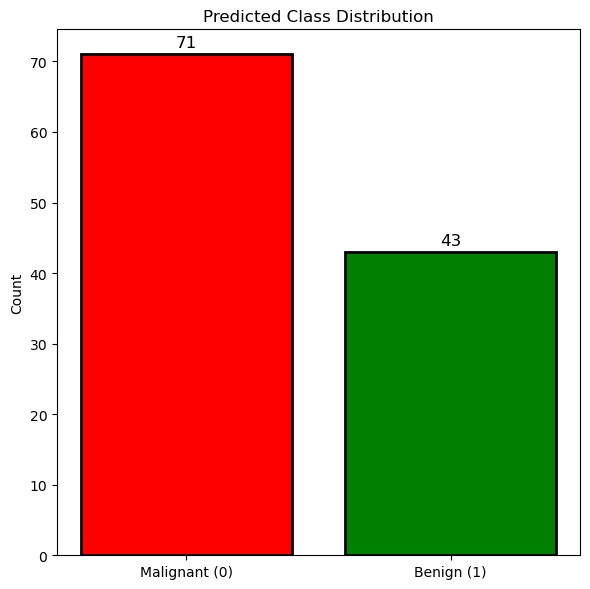

In [13]:
# --- 6.1. Extract selected features from train and test sets ---
X_train_selected = X_train[selected_features_names]
X_test_selected = X_test[selected_features_names]

# --- 6.2. Train SVM using only selected features ---
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_selected, y_train)

# --- 6.3. Predict and evaluate on test set ---
prediction = svm_model.predict(X_test_selected)
print(prediction)
#print(len(prediction))

#counter = Counter(prediction)
#print(f"Count of 0s: {counter[0]}")
#print(f"Count of 1s: {counter[1]}")

# Data
labels = ['Malignant (0)', 'Benign (1)']
counts = [71, 43]
colors = ['red', 'green']

# Plot
plt.figure(figsize=(6, 6))
bars = plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=2)

# Add count labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             str(height), ha='center', fontsize=12)

plt.title('Predicted Class Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [14]:
print("\n--- Evaluation on Test Set ---")
print(f"Accuracy:  {accuracy_score(y_test, prediction):.2f}")


--- Evaluation on Test Set ---
Accuracy:  0.97


In [15]:
accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, prediction))
prediction
print(len(prediction))
counter = Counter(prediction)
print(f"Count of 0s: {counter[1]}")
print(f"Count of 1s: {counter[0]}")


Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

114
Count of 0s: 44
Count of 1s: 70


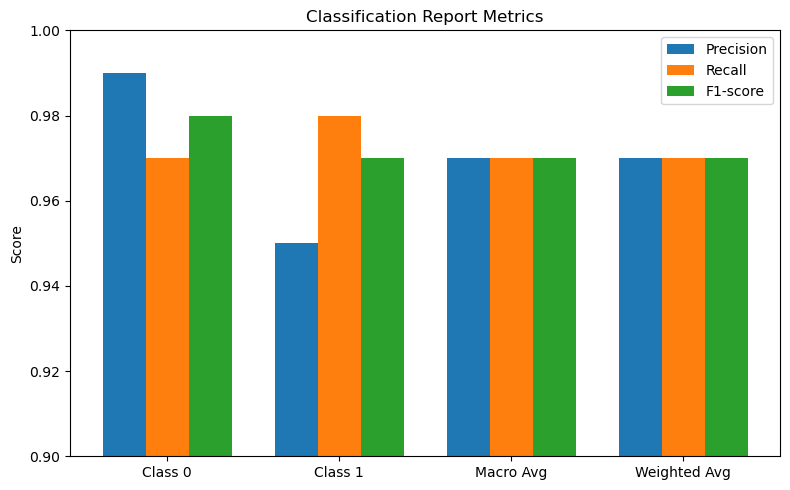

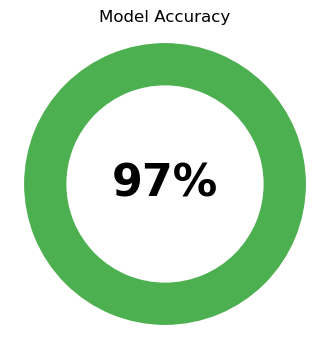

In [16]:
import matplotlib.pyplot as plt
import numpy as np

labels = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
precision = [0.99, 0.95, 0.97, 0.97]
recall = [0.97,0.98, 0.97, 0.97]
f1 = [0.98, 0.97, 0.97, 0.97]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1, width, label='F1-score')

ax.set_ylabel('Score')
ax.set_title('Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0.9, 1.0])
ax.legend()

plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(4,4))
ax.pie([accuracy], startangle=90, colors=['#4CAF50', '#eeeeee'], 
       wedgeprops=dict(width=0.3))
plt.text(0, 0, f"{int(accuracy*100)}%", ha='center', va='center', fontsize=32, fontweight='bold')
plt.title('Model Accuracy')
plt.axis('equal')
plt.show()


Cross-validation scores: [0.97826087 0.93478261 0.97826087 0.93478261 1.         0.97777778
 0.95555556 0.95555556 0.93333333 0.84444444]
Mean cross-validation score: 0.9492753623188406


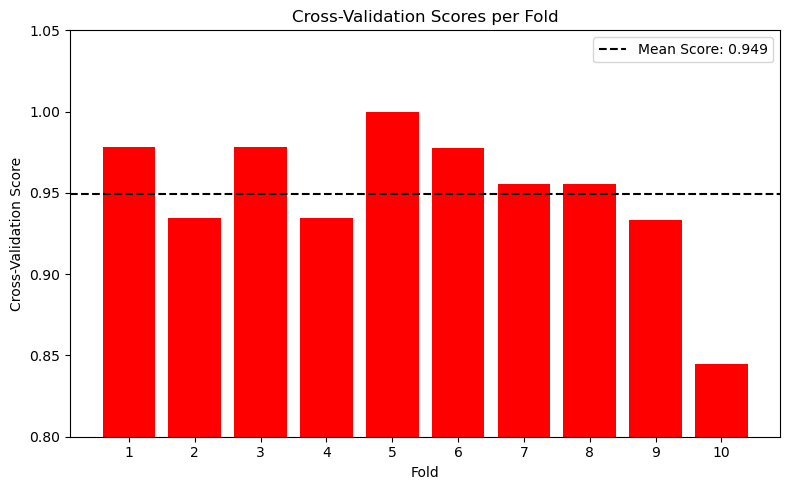

In [18]:
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=10)  # 10-fold cross-validation
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
import matplotlib.pyplot as plt
import numpy as np

scores = [0.97826087, 0.93478261, 0.97826087, 0.93478261, 1.0, 0.97777778,
          0.95555556, 0.95555556, 0.93333333, 0.84444444]
mean_score = 0.9492753623188406

plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, 11), scores, color='red')
plt.axhline(y=mean_score, color='black', linestyle='--', label=f'Mean Score: {mean_score:.3f}')
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores per Fold')
plt.ylim(0.8, 1.05)
plt.xticks(range(1, 11))
plt.legend()
plt.tight_layout()
plt.show()


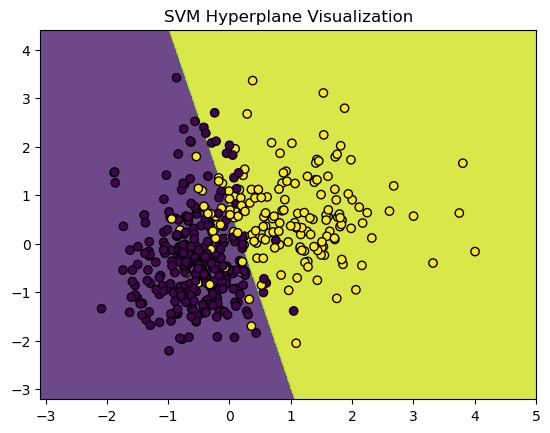

In [19]:
# Function to plot the hyperplane
def plot_hyperplane(svc_model, X, y):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('SVM Hyperplane Visualization')
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# Select two features for visualization
# For example, let's use 'mean radius' and 'mean texture'
X_subset = data[['radius_1ean', 'texture_1ean']].values  # Convert to numpy array
y_subset = data['diagnosis'].values  # Convert to numpy array

# Split the subset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2)

# Scale the subset
X_train_subset_scaled = scaler.fit_transform(X_train_subset)
X_test_subset_scaled = scaler.transform(X_test_subset)

#Train the model on the subset
svm_model.fit(X_train_subset_scaled, y_train_subset)

# Plot the hyperplane
plot_hyperplane(svm_model, X_train_subset_scaled, y_train_subset)

[[69  2]
 [ 1 42]]


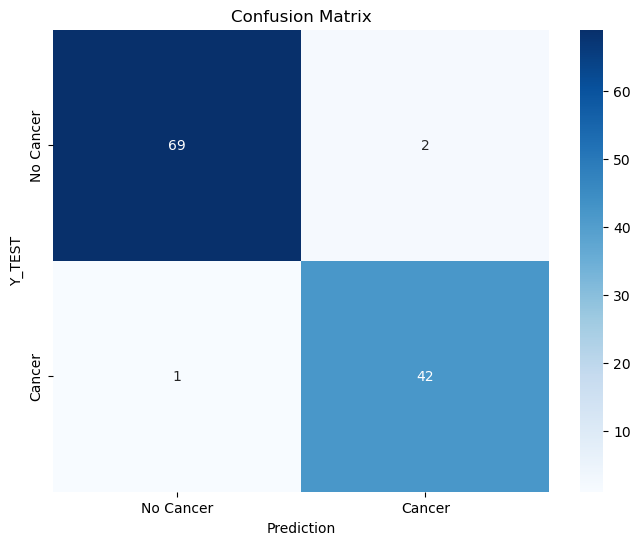

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,prediction)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.ylabel('Y_TEST')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()
